In [1]:
from dqn_learning import *
# import cPickle

%load_ext autoreload
%autoreload 2
%matplotlib inline

# import numpy as np

In [2]:
car = q_learning(gamma=1., 
                 lambda_=0.9, 
#                  init_epsilon = 0.0,
#                  update_epsilon = False,
                 init_epsilon = 1.0,
                 end_epsilon = 0.1,
                 update_epsilon = True,
                 exploration_decrease_length = 1e6,
#                  N_0= 50, 
                 environment = 'MountainCar-v0',
                 plot_resolution = 30,
                 nn_size_hidden = [400,300], # [100,100] --> 0.01, [100,100,100] --> similar [400,300]
                 nn_batch_size = 32,
                 nn_learning_rate = 2.5e-4,
                 replay_memory_size = 1e6, # larger than nn_batch_size*1e3 or doesn't train
                 descent_method = 'rmsprop',
#                  dropout_keep_prob = 0.5,
                 ema_decay_rate = 0.999                 
                )

[2016-07-06 16:36:47,757] Making new env: MountainCar-v0


normaliztion mean [-0.30000001  0.        ]
normalization var [ 0.81    0.0049]
Q-learning configured in nn graph
descending with  rmsprop
lambda 0.9
using environment MountainCar-v0
qnn target q-learning False False


Episode 4
Episode 9
Episode 14
Episode 19
Episode 24
Episode 29
Episode 34
Episode 39
Episode 44
Length 1906
Episode 49
Episode 54
Episode 59
Episode 64
Episode 69
Episode 74
Episode 79
Episode 84
Episode 89
Episode 94
Episode 99
Length 3919
exploration  0.562998700014


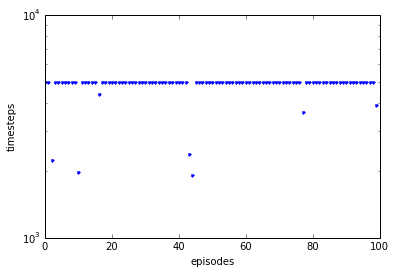

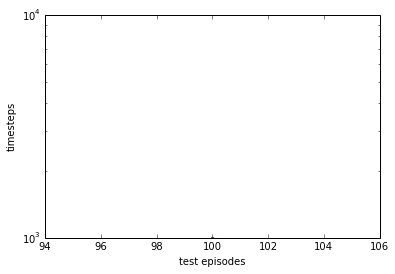

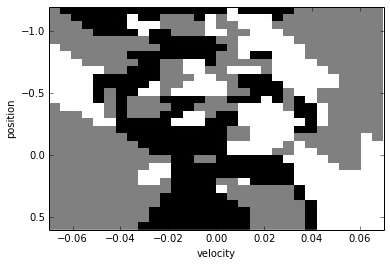

statesshape (900, 2)
deepQshape (900, 3)
plotting the evaluated deepQ-function for action 0



/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


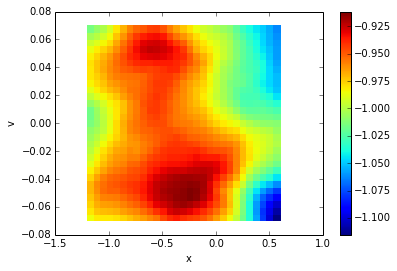

plotting the evaluated deepQ-function for action 1



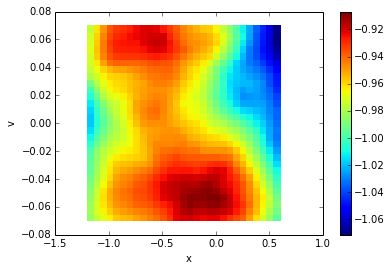

plotting the evaluated deepQ-function for action 2



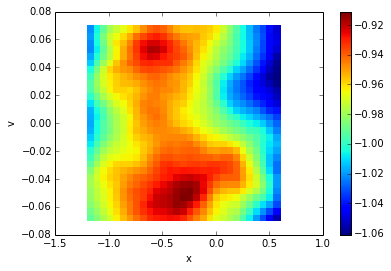

plotting the evaluated deepQ-function star (optimal)



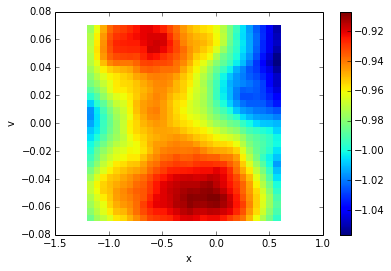

Episode 104
Episode 109
Episode 114
Length 4723
Episode 119
Episode 124
Episode 129
Episode 134
Episode 139
Episode 144
Episode 149
Episode 154
Episode 159
Episode 164
Episode 169


KeyboardInterrupt: 

In [3]:
car.deepq_learning(num_iter = 10000, max_steps = 5000)#, reset_replay_memory=True)

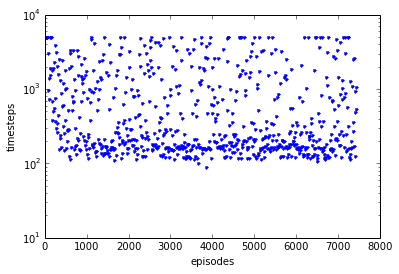

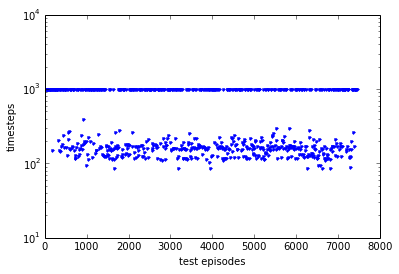

statesshape (900, 2)
deepQshape (900, 3)
plotting the evaluated deepQ-function for action 0



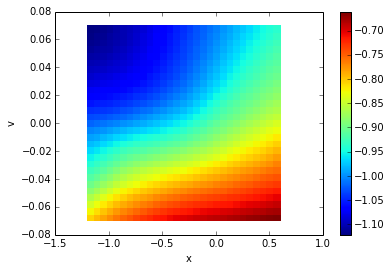

plotting the evaluated deepQ-function for action 1



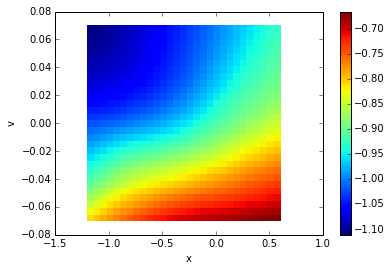

plotting the evaluated deepQ-function for action 2



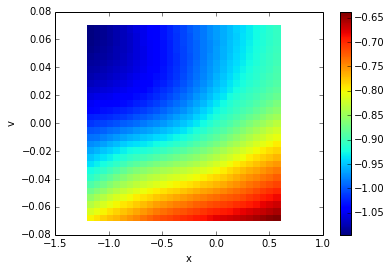

plotting the evaluated deepQ-function star (optimal)



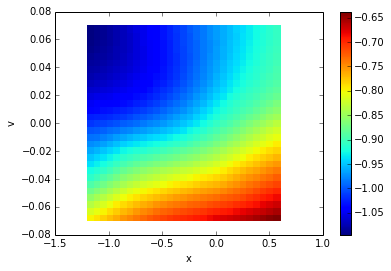

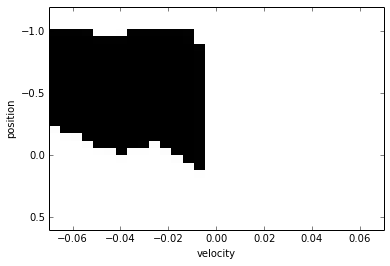

In [4]:
# rmsprop
# with 0.9 dropout
# car.deepq_learning(num_iter = 10000, max_steps = 5000)#, reset_replay_memory=True)
# RESULTS (saved only last because it was too long)
car.plot_training() # limited to 5000
car.plot_testing() # limited to 1000
car.plot_deepQ_function()
car.plot_deepQ_policy(mode='deterministic')

(1000000, 2)


<matplotlib.colorbar.Colorbar instance at 0x7f9291578b90>

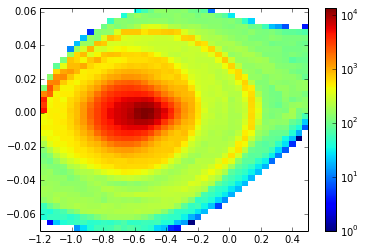

In [5]:
rm=np.array(car.qnn.replay_memory)

states, _,_,_,_ = zip(*rm)

states_np = np.array(states)

states_np = np.squeeze(states_np)
print(states_np.shape)

from matplotlib.colors import LogNorm
x,v = zip(*states_np)
plt.hist2d(x, v, bins=40, norm=LogNorm())
plt.colorbar()